In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 09 00:58:08 2017

@author: jianyuan
"""

#Uber Scripts
#First Part
#written in my sql
'''
SELECT ft.id as `Trip ID`,
  ft.duration as `Duration`,
  ft.start_date as `Start Date`,
  ds1.station_name as `Start Station`,
  ds1.terminal_name as `Start Terminal`,
  ft.end_date as `End Date`,
  ds2.station_name as `End Station`,  
  ds2.terminal_name as `End Terminal`,  
  ft.bike_id as `Bike #`,
  de.entity_type as `Subscriber Type`,
  IFNULL(dez.zip_code,'') as `Zip Code`
FROM fact_trips ft 
LEFT JOIN dim_stations ds1 
    ON ft.start_station_id = ds1.id 
LEFT JOIN dim_stations ds2
    ON ft.end_station_id = ds2.id
LEFT JOIN dim_entity de
    ON ft.entity_id = de.id
LEFT JOIN dim_entity_zip dez
    ON ft.entity_id = dez.entity_id;
'''
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
file1 = pd.read_csv(r'C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\GDA DATA.csv')
file2 = pd.read_csv(r'C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\station.csv')
file2.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [3]:
file1.columns

Index([u'Trip ID', u'Duration', u'Start Date', u'Start Station',
       u'Start Terminal', u'End Date', u'End Station', u'End Terminal',
       u'Bike #', u'Subscriber Type', u'Zip Code'],
      dtype='object')

In [4]:
file2.loc[file2['name']=='Post at Kearney','name'] = 'Post at Kearny'
file2.loc[file2['name']=='Washington at Kearney','name'] = 'Washington at Kearny'
file3 = file2.copy()
file3.columns = ['start_' + i for i in file2.columns]

summary = file1.merge(file3,how = 'left',left_on = 'Start Station',right_on = 'start_name')
file4 = file2.copy()
file4.columns = ['end_' + i for i in file2.columns]
df = summary.merge(file4,how = 'left',left_on = 'End Station',right_on = 'end_name')

In [5]:
summary.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,start_station_id,start_name,start_lat,start_long,start_dockcount,start_landmark,start_installation
0,432946,406,8/31/2014 22:31,Mountain View Caltrain Station,28,8/31/2014 22:38,Castro Street and El Camino Real,32,17,Subscriber,94040,28,Mountain View Caltrain Station,37.394358,-122.076713,23,Mountain View,8/15/2013
1,432945,468,8/31/2014 22:07,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,509,Customer,11231,56,Beale at Market,37.792251,-122.397086,19,San Francisco,8/20/2013
2,432944,534,8/31/2014 22:06,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,342,Customer,11231,56,Beale at Market,37.792251,-122.397086,19,San Francisco,8/20/2013
3,432942,1041,8/31/2014 21:45,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,603,Customer,94521,60,Embarcadero at Sansome,37.804770,-122.403234,15,San Francisco,8/21/2013
4,432941,1091,8/31/2014 21:44,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,598,Customer,94521,60,Embarcadero at Sansome,37.804770,-122.403234,15,San Francisco,8/21/2013


In [6]:
#summary.loc[pd.isnull(summary['start_landmark']),'Start Station'].unique()
#summary.shape

In [7]:
#for i in range(summary.shape[0]):
#    if summary.loc[i,'start_landmark']==summary.loc[i,'end_landmark']:
#        pass
#    else:
#        print(i)
#        break

In [8]:
df['start_landmark'].unique()

array(['Mountain View', 'San Francisco', 'Palo Alto', 'San Jose',
       'Redwood City'], dtype=object)

In [9]:
# convert duration units from seconds to minutes
df['duration'] = df['Duration'].map(lambda x: x*1.0/60)
# reformat datestrings into multiple columns
df['Start Date'] = pd.to_datetime(df['Start Date'],infer_datetime_format = True)
df['start_date']  = pd.to_datetime(df['Start Date'].map(lambda x: x.strftime('%Y-%m-%d')),infer_datetime_format = True)
df['start_year']  = df['Start Date'].map(lambda x: x.year)
df['start_month'] = pd.to_datetime(df['Start Date'].map(lambda x: x.strftime('%Y-%m')),infer_datetime_format = True)
df['start_hour']  = df['Start Date'].map(lambda x: x.hour)
df['weekday']     = df['Start Date'].map(lambda x: x.strftime('%w'))



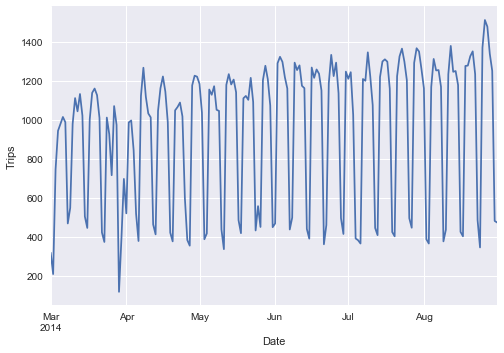

In [10]:
#Daily usage
df['Trip'] = 1
temp = df.groupby('start_date')['Trip'].sum().reset_index()[['start_date','Trip']]
ax = temp.plot.line(x="start_date")
plt.xlabel('Date')
plt.ylabel('Trips')
ax.legend_.remove()
plt.savefig('C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\Trips per day.png')

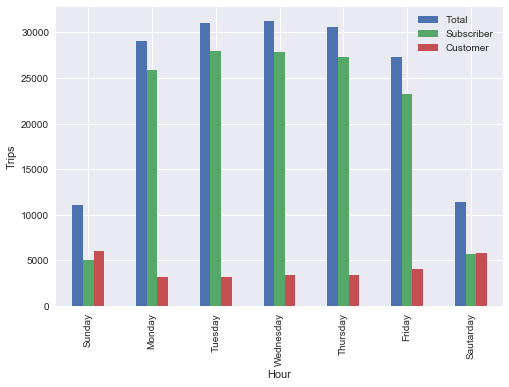

In [11]:
#Trips by Weekday
temp = df.groupby(['weekday'])['Trip'].sum().reset_index()[['weekday','Trip']]
#ax1 = temp.plot.bar(x='weekday',xticks=temp['weekday'])
temp.columns = ['weekday','Total']

temp1 = df[(df['Subscriber Type']=='Subscriber')]
temp1 = temp1.groupby(['weekday'])['Trip'].sum().reset_index()[['weekday','Trip']]
temp1.columns = ['weekday','Subscriber']

temp2 = df[(df['Subscriber Type']!='Subscriber')]
temp2 = temp2.groupby('weekday')['Trip'].sum().reset_index()[['weekday','Trip']]
temp2.columns = ['weekday','Customer']

temp = temp.merge(temp1, on = 'weekday', how = 'left').merge(temp2, on = 'weekday', how = 'left')
dict_week = {}
dict_week['0'] = 'Sunday'
dict_week['1'] = 'Monday'
dict_week['2'] = 'Tuesday'
dict_week['3'] = 'Wednesday'
dict_week['4'] = 'Thursday'
dict_week['5'] = 'Friday'
dict_week['6'] = 'Sautarday'

temp['weekday'] = temp['weekday'].map(lambda x: dict_week[x])
ax3 = temp.plot.bar(x='weekday')
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.savefig('C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\Trips by Weekday.png')

In [15]:
print('average duration',df['duration'].mean())
print(df.shape)
print(df['duration'].sum()/60)

sec = timedelta(seconds=int(df['Duration'].sum()))
d = datetime(1,1,1) + sec

print("Yeears: Months: DAYS:HOURS:MIN:SEC")
print("%d:%d:%d:%d:%d:%d" % (d.year-1,d.month-1,d.day-1, d.hour, d.minute, d.second))
print(min(df['start_date']),max(df['start_date']),max(df['start_date']) -min(df['start_date']))

18.8752374965
(171792, 32)
54043.58
DAYS:HOURS:MIN:SEC
6:2:1:19:34:48
(Timestamp('2014-03-01 00:00:00'), Timestamp('2014-08-31 00:00:00'), Timedelta('183 days 00:00:00'))


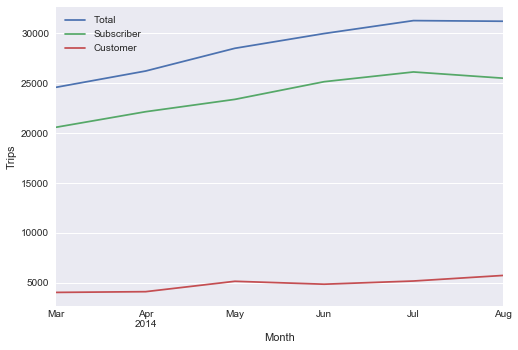

In [16]:
#monthly usage by subscriber type
temp = df.groupby('start_month')['Trip'].sum().reset_index()[['start_month','Trip']]
temp.columns = ['start_month','Total']
temp1 = df[(df['Subscriber Type']=='Subscriber')]
temp1 = temp1.groupby(['start_month'])['Trip'].sum().reset_index()[['start_month','Trip']]
temp1.columns = ['start_month','Subscriber']

temp2 = df[(df['Subscriber Type']!='Subscriber')]
temp2 = temp2.groupby('start_month')['Trip'].sum().reset_index()[['start_month','Trip']]
temp2.columns = ['start_month','Customer']

temp = temp.merge(temp1, on = 'start_month', how = 'left').merge(temp2, on = 'start_month', how = 'left')

ax = temp.plot.line(x='start_month')
plt.xlabel('Month')
plt.ylabel('Trips')
plt.savefig('C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\Trips per month.png')

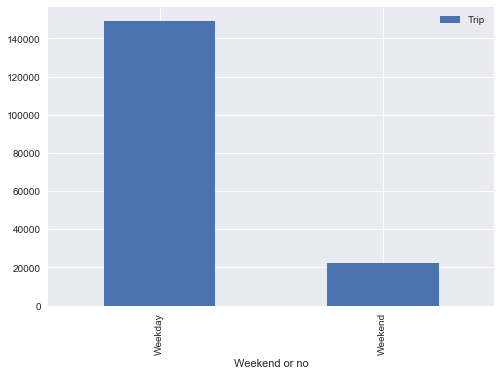

In [17]:
#total usage by weekday
df['Weekend or no'] = '?'
df.loc[df['weekday'].isin(['0','6']),'Weekend or no'] = 'Weekend'
df.loc[~df['weekday'].isin(['0','6']),'Weekend or no'] = 'Weekday'
temp = df.groupby('Weekend or no')['Trip'].sum().reset_index()[['Weekend or no','Trip']]
temp.plot.bar(x='Weekend or no')

In [50]:
#temp = df[~df['weekday'].isin(['0','6'])]
#temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
#temp.columns = ['start_hour','Total']
#ax = temp.plot.line(x='start_hour',xticks=temp['start_hour'])

#temp = df[df['weekday'].isin(['0','6'])]
#temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
#emp.columns = ['start_hour','Weekend']
#ax1 = temp.plot.line(x='start_hour',ax =ax)


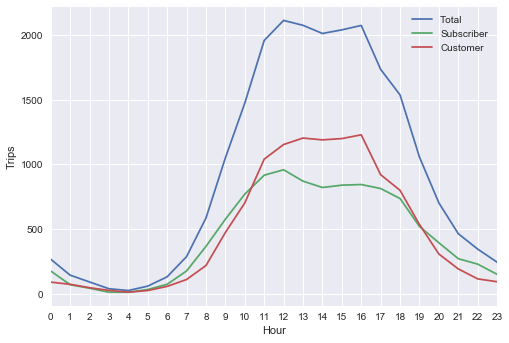

In [19]:
#hourly uasge by subsriber type in weekends 
temp = df[df['weekday'].isin(['0','6'])]
temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
temp.columns = ['start_hour','Total']
ax1 = temp.plot.line(x='start_hour',xticks=temp['start_hour'])

temp = df[df['weekday'].isin(['0','6'])&(df['Subscriber Type']=='Subscriber')]
temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
temp.columns = ['start_hour','Subscriber']
ax2 = temp.plot.line(x='start_hour', ax=ax1)
temp = df[df['weekday'].isin(['0','6'])&(df['Subscriber Type']!='Subscriber')]
temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
temp.columns = ['start_hour','Customer']
ax3 = temp.plot.line(x='start_hour',ax=ax2)
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.savefig('C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\Trips per hour-Weekend.png')

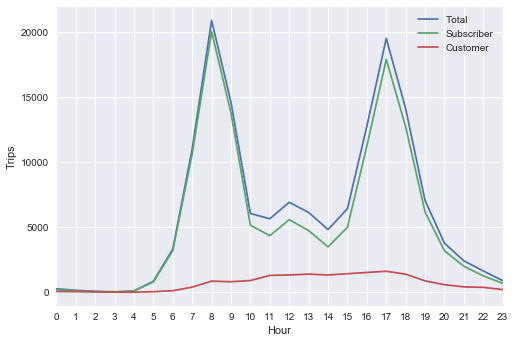

In [20]:
#hourly uasge by subsriber type in weekdays 
temp = df[~df['weekday'].isin(['0','6'])]
temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
temp.columns = ['start_hour','Total']
ax = temp.plot.line(x='start_hour',xticks=temp['start_hour'])

temp = df[(~df['weekday'].isin(['0','6']))&(df['Subscriber Type']=='Subscriber')]
temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
temp.columns = ['start_hour','Subscriber']
ax1 = temp.plot.line(x='start_hour', ax=ax)
temp = df[(~df['weekday'].isin(['0','6']))&(df['Subscriber Type']!='Subscriber')]
temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
temp.columns = ['start_hour','Customer']
ax2 = temp.plot.line(x='start_hour',ax =ax1)
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.savefig('C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\Trips per hour-Weekday.png')

In [53]:
#temp = df[~df['weekday'].isin(['0','6'])]
#temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
#temp.columns = ['start_hour','Weekday']
#ax1 = temp.plot.line(x='start_hour',ax =ax)
#ax = temp.plot.line(x='start_hour',xticks=temp['start_hour'])
#temp = df[df['weekday'].isin(['0','6'])]
#temp = temp.groupby('start_hour')['Trip'].sum().reset_index()[['start_hour','Trip']]
#temp.columns = ['start_hour','Weekend']
#ax1 = temp.plot.line(x='start_hour',ax =ax)

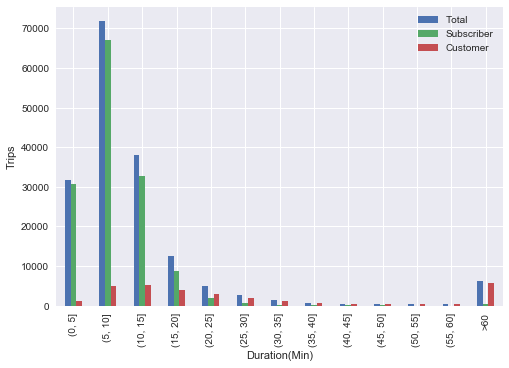

In [55]:
#duration(min)
#df['duration'].hist(bins = range(0,65,5))
bins = range(0,65,5) + [1000000000]
categories = pd.cut(df['duration'], bins)#, labels=group_names
Duration = categories.to_frame()
Duration['Total'] = 1
Dp = Duration.groupby('duration').sum().reset_index()

categories = pd.cut(df.loc[df['Subscriber Type']=='Subscriber','duration'], bins)
Duration = categories.to_frame()
Duration['Subscriber'] = 1
Dp2 = Duration.groupby('duration').sum().reset_index()


categories = pd.cut(df.loc[df['Subscriber Type']!='Subscriber','duration'], bins)
Duration = categories.to_frame()
Duration['Customer'] = 1
Dp3 = Duration.groupby('duration').sum().reset_index()

Dp = Dp.merge(Dp2, on='duration', how='left').merge(Dp3, on = 'duration',how='left')
ax = Dp.plot(kind = 'bar')

bin_label = list(Duration['duration'].cat.categories)
bin_label.remove('(60, 1000000000]')
bin_label = bin_label + ['>60']

ax.set_xticklabels(bin_label)
#plt.show()
plt.xlabel('Duration(Min)')
plt.ylabel('Trips')
plt.savefig('C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\Trips per duration(min).png')

In [25]:
Dp

,duration,Total,Subscriber,Customer
0,"(0, 5]",31843,30726,1117
1,"(5, 10]",71905,67065,4840
2,"(10, 15]",37972,32816,5156
3,"(15, 20]",12633,8659,3974
4,"(20, 25]",4839,1978,2861
5,"(25, 30]",2610,728,1882
6,"(30, 35]",1326,276,1050
7,"(35, 40]",784,127,657
8,"(40, 45]",536,64,472
9,"(45, 50]",479,48,431


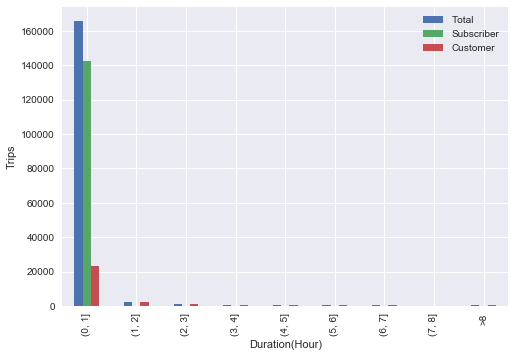

In [26]:
#duration(hour)
bins1 = range(0,9,1) + [1000000000]
df['duration-hour'] = df['duration'].map(lambda x: x/60)
categories = pd.cut(df['duration-hour'], bins1)#, labels=group_names
Duration = categories.to_frame()
Duration['Total'] = 1
Dp = Duration.groupby('duration-hour').sum().reset_index()

categories = pd.cut(df.loc[df['Subscriber Type']=='Subscriber','duration-hour'], bins1)
Duration = categories.to_frame()
Duration['Subscriber'] = 1
Dp2 = Duration.groupby('duration-hour').sum().reset_index()


categories = pd.cut(df.loc[df['Subscriber Type']!='Subscriber','duration-hour'], bins1)
Duration = categories.to_frame()
Duration['Customer'] = 1
Dp3 = Duration.groupby('duration-hour').sum().reset_index()

Dp = Dp.merge(Dp2, on='duration-hour', how='left').merge(Dp3, on = 'duration-hour',how='left')
ax = Dp.plot(kind = 'bar')

bin_label = list(categories.cat.categories)
bin_label.remove('(8, 1000000000]')
bin_label = bin_label + ['>8']

ax.set_xticklabels(bin_label)
#plt.show()
plt.xlabel('Duration(Hour)')
plt.ylabel('Trips')
plt.savefig('C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\Trips per duration(hour).png')

In [27]:
Dp

,duration-hour,Total,Subscriber,Customer
0,"(0, 1]",165683,142541,23142
1,"(1, 2]",2401,142,2259
2,"(2, 3]",1236,54,1182
3,"(3, 4]",777,28,749
4,"(4, 5]",494,17,477
5,"(5, 6]",289,8,281
6,"(6, 7]",234,10,224
7,"(7, 8]",173,7,166
8,"(8, 1000000000]",505,75,430


In [28]:
#calculate the distance between 2 points
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df['distance-km'] = haversine_np(df['start_long'],df['start_lat'],df['end_long'],df['end_lat'])

In [56]:
f = {'duration':'mean', 'Trip':'sum'}
#Number of trips by start stations
#start station
distance = df[['Start Station','distance-km','Trip','duration']].groupby(['Start Station']).agg(f).reset_index()
distance.sort_values('Trip',ascending=False).iloc[0:10,:]

,Start Station,duration,Trip
50,San Francisco Caltrain (Townsend at 4th),13.300521,12950
24,Harry Bridges Plaza (Ferry Building),25.176078,8336
18,Embarcadero at Sansome,25.456598,7010
51,San Francisco Caltrain 2 (330 Townsend),12.301767,7008
2,2nd at Townsend,15.147860,6824
30,Market at Sansome,14.969270,6819
65,Temporary Transbay Terminal (Howard at Beale),10.965793,6540
64,Steuart at Market,18.105870,6238
66,Townsend at 7th,11.920007,5479
29,Market at 4th,22.496063,5241


In [57]:
#Number of trips by end stations
#end station
distance = df[['End Station','distance-km','Trip','duration']].groupby(['End Station']).agg(f).reset_index()
distance.sort_values('Trip',ascending=False).iloc[0:10,:]

,End Station,duration,Trip
50,San Francisco Caltrain (Townsend at 4th),12.825121,16732
18,Embarcadero at Sansome,31.581722,8141
24,Harry Bridges Plaza (Ferry Building),19.605760,7908
30,Market at Sansome,11.855098,7879
51,San Francisco Caltrain 2 (330 Townsend),11.937437,7482
2,2nd at Townsend,13.273762,7411
64,Steuart at Market,15.894316,6328
66,Townsend at 7th,11.816086,6142
65,Temporary Transbay Terminal (Howard at Beale),10.580879,5758
39,Powell Street BART,21.729243,5448


In [32]:
#Number of trips by start stations
#subscriber
temp_dis = df[df['Subscriber Type']=='Subscriber']
distance1 = temp_dis[['Start Station','distance-km','Trip','duration']].groupby(['Start Station']).agg(f).reset_index()
distance1.sort_values('Trip',ascending=False).iloc[0:10,:]


,Start Station,duration,Trip
50,San Francisco Caltrain (Townsend at 4th),11.145206,12077
51,San Francisco Caltrain 2 (330 Townsend),10.089317,6573
65,Temporary Transbay Terminal (Howard at Beale),9.499169,6297
30,Market at Sansome,8.466336,5996
2,2nd at Townsend,9.597490,5889
24,Harry Bridges Plaza (Ferry Building),12.365411,5601
64,Steuart at Market,10.370688,5305
66,Townsend at 7th,9.972953,5035
28,Market at 10th,10.925861,4164
1,2nd at South Park,8.596281,4119


In [33]:
#Number of trips by end stations
##subscriber
distance1 = temp_dis[['End Station','distance-km','Trip','duration']].groupby(['End Station']).agg(f).reset_index()
distance1.sort_values('Trip',ascending=False).iloc[0:10,:]

,End Station,duration,Trip
50,San Francisco Caltrain (Townsend at 4th),10.572210,15596
30,Market at Sansome,7.578805,7185
51,San Francisco Caltrain 2 (330 Townsend),10.216223,7100
2,2nd at Townsend,9.606180,6462
66,Townsend at 7th,10.237556,5692
24,Harry Bridges Plaza (Ferry Building),8.822579,5632
65,Temporary Transbay Terminal (Howard at Beale),8.928120,5572
64,Steuart at Market,8.560348,5241
39,Powell Street BART,9.110249,4264
18,Embarcadero at Sansome,11.019900,4258


In [34]:
#Number of trips by start stations
#customer
temp_dis1 = df[df['Subscriber Type']!='Subscriber']
distance2 = temp_dis1[['Start Station','distance-km','Trip','duration']].groupby(['Start Station']).agg(f).reset_index()
distance2.sort_values('Trip',ascending=False).iloc[0:10,:]

,Start Station,duration,Trip
18,Embarcadero at Sansome,45.082212,3002
24,Harry Bridges Plaza (Ferry Building),51.411012,2735
29,Market at 4th,68.590922,1208
39,Powell Street BART,78.480948,1083
19,Embarcadero at Vallejo,58.010883,1046
40,Powell at Post (Union Square),73.722178,1001
2,2nd at Townsend,50.106292,935
64,Steuart at Market,62.087799,933
50,San Francisco Caltrain (Townsend at 4th),43.116953,873
30,Market at Sansome,62.346659,823


In [35]:
#Number of trips by end stations
#customer
temp_dis1 = df[df['Subscriber Type']!='Subscriber']
distance2 = temp_dis1[['End Station','distance-km','Trip','duration']].groupby(['End Station']).agg(f).reset_index()
distance2.sort_values('Trip',ascending=False).iloc[0:10,:]

,End Station,duration,Trip
18,Embarcadero at Sansome,54.129299,3883
24,Harry Bridges Plaza (Ferry Building),46.288921,2276
29,Market at 4th,67.796402,1186
39,Powell Street BART,67.174676,1184
50,San Francisco Caltrain (Townsend at 4th),43.755047,1136
64,Steuart at Market,51.255244,1087
19,Embarcadero at Vallejo,62.000096,1045
40,Powell at Post (Union Square),84.536883,1000
2,2nd at Townsend,38.247331,949
23,Grant Avenue at Columbus Avenue,62.222273,880


In [36]:
#percantage of bikes are muanlly transported
bike = df[['Bike #', 'start_date','Start Station','End Station','Trip']].groupby(['Bike #', 'start_date','Start Station','End Station']).sum()['Trip'].reset_index()

In [37]:
A = df[['Bike #', 'start_date','Start Station','End Station','Trip','Start Date','Trip']].sort_values(['Bike #','start_date']).reset_index(drop=True)
B = pd.concat([pd.DataFrame(np.zeros([1,A.shape[1]]),columns = A.columns),pd.DataFrame(A.copy())]).reset_index(drop=True)

In [38]:
A = pd.concat([pd.DataFrame(A.copy()),pd.DataFrame(np.zeros([1,A.shape[1]]),columns = A.columns)]).reset_index(drop=True)
B.columns = [i+'_previous' for i in A.columns]
A.columns = [i+'_later' for i in A.columns]
C = pd.concat([B,A],axis=1)

In [39]:
#bike_trasported_per_day = C[(C['Bike #_previous']==C['Bike #_later'])&(C['End Station_previous']!=C['Start Station_later'])].groupby('start_date_previous')['Bike #_previous'].nunique().reset_index()


In [40]:
#bike_trasported_per_day =  bike[bike['Start Station']!=bike['End Station']].groupby('start_date').sum()['Trip'].reset_index()
#bike_trasported_per_day.columns  = ['date','']

In [41]:
Trip_trasported_per_day = C[(C['Bike #_previous']==C['Bike #_later'])&(C['End Station_previous']!=C['Start Station_later'])].groupby('start_date_previous')['Trip_previous'].sum().reset_index()
Trip_trasported_per_day

,start_date_previous,level_1,Trip_previous
0,2014-03-01,Trip_previous,252.0
1,2014-03-01,Trip_previous,252.0
2,2014-03-02,Trip_previous,162.0
3,2014-03-02,Trip_previous,162.0
4,2014-03-03,Trip_previous,644.0
5,2014-03-03,Trip_previous,644.0
6,2014-03-04,Trip_previous,848.0
7,2014-03-04,Trip_previous,848.0
8,2014-03-05,Trip_previous,875.0
9,2014-03-05,Trip_previous,875.0


In [42]:
Trip_per_day = df[['start_date','Trip']].groupby(['start_date'])['Trip'].sum().reset_index()
Trip_per_day

,start_date,Trip
0,2014-03-01,318
1,2014-03-02,208
2,2014-03-03,746
3,2014-03-04,944
4,2014-03-05,979
5,2014-03-06,1015
6,2014-03-07,988
7,2014-03-08,468
8,2014-03-09,548
9,2014-03-10,980


In [43]:
Trip_trasported_per_day = Trip_trasported_per_day[['start_date_previous','Trip_previous']]
Trip_trasported_per_day.columns = ['date','Trip_trasported_by_program']
Trip_per_day.columns = ['date','Trip']
Trip_percentage = Trip_per_day.merge(Trip_trasported_per_day,how = 'left',on='date')

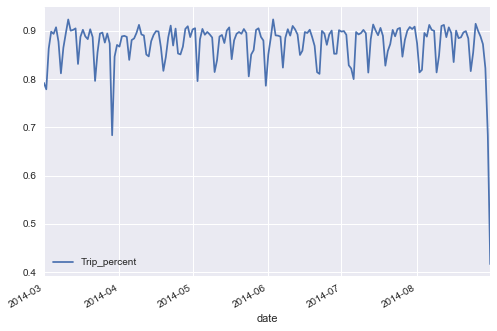

In [44]:
Trip_percentage['Trip_percent'] = Trip_percentage['Trip_trasported_by_program']/Trip_percentage['Trip']
Trip_percentage[['date','Trip_percent']].plot(x='date')

In [45]:
#throughput
df['End Date'] = pd.to_datetime(df['End Date'],infer_datetime_format = True)
df['end_date']  = pd.to_datetime(df['End Date'].map(lambda x: x.strftime('%Y-%m-%d')),infer_datetime_format = True)
df['end_year']  = df['End Date'].map(lambda x: x.year)
df['end_month'] = pd.to_datetime(df['Start Date'].map(lambda x: x.strftime('%Y-%m')),infer_datetime_format = True)
df['end_hour']  = df['End Date'].map(lambda x: x.hour)
df['end_weekday']     = df['End Date'].map(lambda x: x.strftime('%w'))
#u'Bike #'
A = df.groupby(['Start Station', u'Subscriber Type',  u'start_date', u'start_year',
       u'start_month', u'start_hour', u'weekday', u'Weekend or no'])['Trip'].sum().reset_index()
B = df.groupby([ u'End Station', u'Subscriber Type',  u'end_date', u'end_year',
       u'end_month', u'end_hour', u'end_weekday', u'Weekend or no'])['Trip'].sum().reset_index()
A.columns

Index([  u'Start Station', u'Subscriber Type',      u'start_date',
            u'start_year',     u'start_month',      u'start_hour',
               u'weekday',   u'Weekend or no',            u'Trip'],
      dtype='object')

In [46]:
A.columns = ['Station', u'Subscriber Type',  u'date', u'year',
       u'month', u'hour', u'weekday', u'Weekend or no','Trip(out)'] 
B.columns = ['Station', u'Subscriber Type',  u'date', u'year',
       u'month', u'hour', u'weekday', u'Weekend or no','Trip(in)'] 

B['Weekend or no'] = '?'
B.loc[B['weekday'].isin(['0','6']),'Weekend or no'] = 'Weekend'
B.loc[~B['weekday'].isin(['0','6']),'Weekend or no'] = 'Weekday'

C = A.merge(B,on=['Station', u'Subscriber Type',  u'date', u'year',
       u'month', u'hour', u'weekday', u'Weekend or no',],how = 'outer')
C=C.fillna(0)
C['diff'] = C['Trip(in)']-C['Trip(out)']


C = C.merge(file2,how = 'left',left_on = 'Station',right_on = 'name')


In [47]:
C.to_csv(r'C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\tranport.csv', index =False)

In [48]:
#bike_trasported_per_day.columns = ['start_date','Bike #_transported'] Bikes_used_per_day.columns
#Bikes_used_per_day =  df[['start_date','Bike #']].groupby(['start_date'])['Bike #'].nunique().reset_index()
#Bikes_used_per_day
#Bikes_used_per_day.plot(x='start_date')

In [58]:
df_output = df[[u'Trip ID', u'Duration', u'Start Date', u'Start Station',
       u'Start Terminal', u'End Date', u'End Station', u'End Terminal',
       u'Bike #', u'Subscriber Type', u'Zip Code', u'start_station_id',
       u'start_name', u'start_lat', u'start_long', u'start_dockcount',
       u'start_landmark', u'start_installation', u'end_station_id',
       u'end_name', u'end_lat', u'end_long', u'end_dockcount', u'end_landmark',
       u'end_installation', u'duration', u'start_date', u'start_year',
       u'start_month', u'start_hour', u'weekday', u'Trip', u'Weekend or no', u'duration-hour','distance-km']]

In [59]:
df_output.to_csv(r'C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\output.csv', index =False)

In [60]:
print(df[(df['Subscriber Type']=='Subscriber')&(df['start_landmark']=='San Francisco')]['Trip'].sum()*1.0/df['Trip'].sum())

0.743835568595


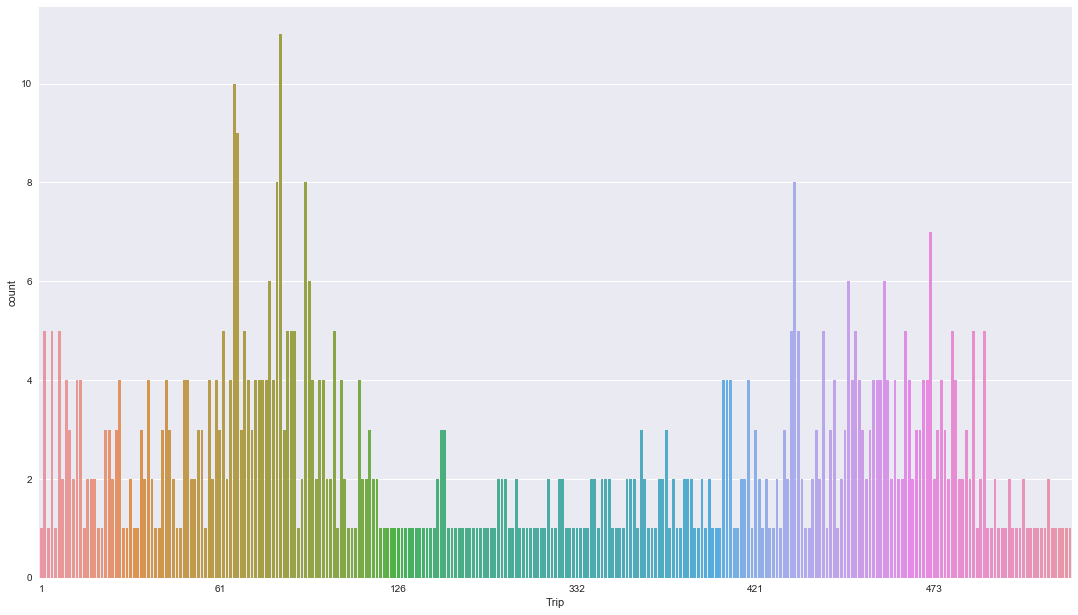

In [61]:
#frequency plot
bike_o = df.groupby('Bike #')['Trip'].sum().reset_index()
bike_o['count'] =1 
#bike_o['Trip'] =bike_o['Trip'] .astype(str)
#bike_o[['Trip','count']].groupby('Trip')['count'].sum().plot('bar', x='Trip')
sns.countplot(bike_o['Trip'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(range(0,len(bike_o['Trip'].unique()),50), [sorted(bike_o['Trip'].unique())[i] for i in range(0,len(bike_o['Trip'].unique()),50)])
fig.savefig(r'C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\Pic\test2png.png', dpi=400)
#bike_o['Trip'].sort_values(ascending=False)
#bike_o.sort_values('Trip',ascending=False).to_csv(r'C:\Users\jianyuan\Desktop\Uber\GDA DATA.csv (3)\bike.csv', index =False)